Let's work through some exercise problems in Chapter 2 of {% cite mcelreath2020statistical %}.

In [1]:
import arviz as az
import numpy as np
import pymc3 as pm

from matplotlib import pylab as plt
from scipy import stats

In [2]:
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)

az.style.use("arviz-darkgrid")

##2M1

*Recall the globe tossing model from the chapter. Compute and plot the grid approximate posterior distribution for each of the following sets of observations. In each case, assume a uniform prior for p.*

1.   *W, W, W*
2.   *W, W, W, L*
3.   *L, W, W, L, W, W, W*

In [3]:
# Each tuple is:
# ( Observation , Waters, Trials )
# (1,3,3) means that observation 1 consists of
# 3 waters in 3 globe tosses
data = [(1, 3, 3), (2, 3, 4), (3, 5, 7)]

In [42]:
def grid_approx(num_grid_points, successes, tosses):
    ngp = int(num_grid_points)
    p_success = np.linspace(0, 1, ngp)
    
    likelihood = stats.binom.pmf(k=successes, n=tosses, p=p_success)
    # uniform prior
    prior = np.repeat(1., ngp)

    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    
    return p_success, posterior

In [43]:
grid_approx(5, 3, 3)

(array([0.  , 0.25, 0.5 , 0.75, 1.  ]), array([0.  , 0.01, 0.08, 0.27, 0.64]))

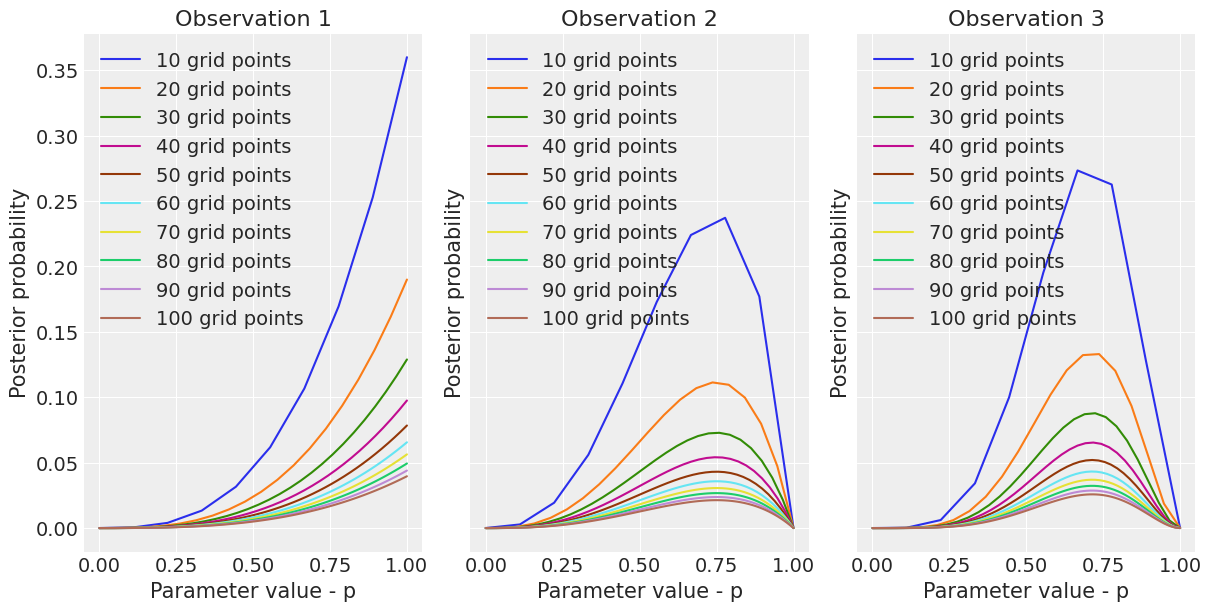

In [44]:
_, axs = plt.subplots(1, len(data), sharex=True, sharey=True, figsize=(12,6))

for observation, waters, tosses in data:    
  for num_grid_points in np.linspace(10, 100, 10):
      p_grid, posterior = grid_approx(num_grid_points, waters, tosses)
      axs[observation-1].plot(p_grid, posterior, 
                              label = f'{int(num_grid_points)} grid points')
  axs[observation-1].set_title(f'Observation {observation}')
  axs[observation-1].set_xlabel('Parameter value - p')
  axs[observation-1].set_ylabel('Posterior probability')
  axs[observation-1].legend()

##2M3

*Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered in water and the Mars globe is 100% land. One of these globes was tossed in the air and produced a “land” observation. Each globe was equally likely to be tossed. Compute the posterior probability that the globe was the Earth, conditional on seeing “land”.*

$Pr(Earth|land) = \frac{Pr(land|Earth)Pr(Earth)}{Pr(land|Earth)Pr(Earth) + Pr(land|Mars)Pr(Mars)} = \frac{(1-0.7)*0.5}{(1-0.7)*0.5 + 1.0*0.5} = 0.23$

##2M4
*Suppose you have a deck with only three cards. Each card has two sides, and each side is either black or white. One card has two black sides, the second card has one black, one white side and the third card has two white sides. Now these cards are shuffled in a bag, one is drawn and placed flat on a table. A black side is showing up. What is the color of the other side?*

Let $C_{1}$ denote the card with 2 black sides, $C_{2}$ be the card with one black and one white side and $C_{3}$ be the card with two white sides.

Now, $Pr(\text{Side facing down is Black} | \text{Side facing up is Black}) = \frac{Pr(\text{Side facing down is Black AND Side facing up is Black})}{Pr(\text{Side facing up is Black})}$

The numerator can be computed as:
$Pr(\text{Side facing down is Black AND Side facing up is Black}) = Pr(C_{1})Pr(\text{Side facing up is Black}|C_{1}) = \frac{1}{3}$

The $1/3$ is because each card is equally likely to be drawn. 

The denominator can be computed as:
$Pr(\text{Side facing up is Black}) = \sum_{i=1}^{3}Pr(C_{i})Pr(\text{Side facing up is Black}|C_{i}) = \frac{1}{3}(1.0 + 0.5 + 0) = \frac{1}{2}$

Thus,
$Pr(\text{Side facing down is Black} | \text{Side facing up is Black}) = \frac{1/3}{1/2} = \frac{2}{3}$

Another way to think about this is that there are three ways for the face up card to be black. Two ways if $C_{1}$ is drawn and one way if $C_{2}$ is drawn. And in only two of those ways is the side facing down also black.

##2M5
*Now suppose there are four cards: B/B, B/W, W/W and another B/B. Again suppose a card is drawn from the bag and a black side appears face up. Again calculate the probability that the other side is black.*

Given that drawing each card is equally likely then there are $5$ ways for the face up card to be black ($2$ ways each from the first and the last card and one way from the second card). Out of these there are $4$ ways for the face down card to be black. 

Hence the probability that the side facing down is black given that the side facing up is black is $4/5$.

##2M6
*Imagine that black ink is heavy, and so cards with black sides are heavier that cards with white sides. Assume again there are three cards: B/B, B/W, and W/W and assume that for every way to pull B/B there are two ways to pull B/W and 3 ways to pull the W/W card. Again, a card is pulled and a black side appears face up. What is the probability that the other side is black?*

So there are $2$ ways to get the side facing up as black from B/B. There are also $2$ ways to get the side facing up as black from B/W (since we were told that there are two ways of drawing B/W for every way to draw B/B). Of these $4$ ways there are $2$ ways in which the face down card is also black. 

Hence the probability that the side facing down is black given that the side facing up is black is $2/4$ or $0.5$.

##2M7

*Assume again the original card problem (2M4). This time, before looking at the other side, we draw another card from the bag and lay it face up on the table. The face that is shown on the new card is white. What is the probability that the first card is black on the other side?*

|$C_1$|$C_{2}$|ways|
|---|---|--|
| BB  | BW  | 2x1=2 |
| BB  | WW  | 2x2=4 |
| BW  | WW  | 1x2=2 |

There are 8 ways of drawing two cards one after the other such that the side facing up is black for the first card and is white for the second card. Of these there are 6 ways for the side facing down of the first card to be black. Thus the probability is $6/8$ or $0.75$.

## 2H1
*Suppose there are two species of panda bear. Both are equally common, they look exactly the same and there’s no genetic test to distinguish between them yet. They only differ in family size: Species A gives birth to twins 10% of the time while Species B births twins 20% of the time (otherwise it’s a single infant). Imagine you have a female panda that just gave birth to twins. What is the probability that her next birth will also be twins?*

Let $T_1$ and $T_2$ denote the event of having twins on the first and second birth respectively.

$Pr(T_2|T_1) = \frac{Pr(T_2,T_1)}{Pr(T_1)} = \frac{Pr(T_2,T_1 | \text{Species A})Pr(\text{Species A}) + Pr(T_2,T_1 | \text{Species B})Pr(\text{Species B}) }{ Pr(T_1 | \text{Species A})Pr(\text{Species A}) + Pr(T_1 | \text{Species B})Pr(\text{Species B}) }$

Since the species are equally common this means $Pr(\text{Species A}) = Pr(\text{Species B}) = 0.5$ and we can rewrite the above as:

$Pr(T_2|T_1) = \frac{Pr(T_2,T_1 | \text{Species A}) + Pr(T_2,T_1 | \text{Species B}) }{ Pr(T_1 | \text{Species A}) + Pr(T_1 | \text{Species B}) } = \frac{0.1*0.1 + 0.2*0.2}{0.1+0.2} = \frac{0.05}{0.3} = \frac{1}{6} \approx 0.17$


## 2H2

*Now compute the probability that the panda we have is from species A, given that we observed one twin birth.*

$Pr(\text{Species A} | T_1) = \frac{Pr(\text{Species A} , T_1)}{ Pr(T_1) } = \frac{ Pr(T_1 | \text{Species A})Pr(\text{Species A}) }{ Pr(T_1 | \text{Species A})Pr(\text{Species A}) + Pr(T_1 | \text{Species B})Pr(\text{Species B}) } = \frac{0.1*0.5}{0.1*0.5+0.2*0.5}=\frac{1}{3}$

## 2H3
*Suppose the same panda mother has a second birth, this time to a singleton infant. What is the probability that this pandas is from species A?*

Let $S_2$ denote the event of a singleton infant in the second birth.

$𝑃𝑟(\text{ Species A }|𝑇_1,S_2) = \frac{ Pr(T_1,S_2 | \text{Species A})Pr(\text{Species A}) }{ Pr(T_1,S_2 | \text{Species A})Pr(\text{Species A}) + Pr(T_1,S_2 | \text{Species B})Pr(\text{Species B}) } = \frac{0.1*0.9*0.5}{0.1*0.9*0.5+0.2*0.8*0.5}=\frac{9}{25} = 0.36$

The nicer way to think about this is that the posterior from 2H2 gives us the updated priors for Species A and Species B (as $1/3$ and $2/3$ respectively).

Using these updated priors we get

$𝑃𝑟(\text{ Species A }|S_2) = \frac{ Pr(S_2 | \text{Species A})Pr(\text{Species A}) }{ Pr(S_2 | \text{Species A})Pr(\text{Species A}) + Pr(S_2 | \text{Species B})Pr(\text{Species B}) } = \frac{0.9*(1/3)}{0.9*(1/3)+0.8*(2/3)}=\frac{9}{25} = 0.36$

## 2H4

*Suppose now, there is a new genetic test that can identify the species of our mother panda. The test is imperfect though:*

*   *The probability it correctly identifies a species A panda is 0.8.*
*   *The probability it correctly identifies a species B panda is 0.65.*

*The test for our mother panda is positive for species A. Ignoring the information from the births, what is the probability that our panda is species A? Next redo your calculation, now using the data on both births (twins followed by singleton).*

Let $A$ and $B$ denote the event of testing positive for Species A and Species B respectively.

$Pr(\text{Species A} | A) = \frac{Pr(A | \text{Species A} )Pr(\text{Species A})}{Pr(A | \text{Species A} )Pr(\text{Species A}) + Pr(A | \text{Species B} )Pr(\text{Species B})} = \frac{0.8*0.5}{0.8*0.5+0.35*0.5} = 0.6956$

Now using the data on two births and the preceding as a prior we get:

$𝑃𝑟(\text{ Species A }|A,𝑇_1,S_2) = \frac{ Pr(T_1,S_2 | \text{Species A})Pr(\text{Species A}|A) }{ Pr(T_1,S_2 | \text{Species A})Pr(\text{Species A}|A) + Pr(T_1,S_2 | \text{Species B})Pr(\text{Species B}|A) } = \frac{0.1*0.9*0.6956}{0.1*0.9*0.6956+0.2*0.8*0.3044}= 0.56$

Yet another way to attack this problem is to use the posterior 2H3 as our prior for Species A and Species B respectively,

$Pr(\text{Species A} | A,𝑇_1,S_2) = \frac{Pr(A | \text{Species A} )Pr(\text{Species A}|𝑇_1,S_2)}{Pr(A | \text{Species A} )Pr(\text{Species A}|𝑇_1,S_2) + Pr(A | \text{Species B} )Pr(\text{Species B}|𝑇_1,S_2)} = \frac{0.8*0.36}{0.8*0.36+0.35*(1-0.36)} = 0.56$

References

{% bibliography --cited %}